<a href="https://colab.research.google.com/github/Sachin04t/Meat-the-Economy/blob/main/CS506_MeattheEconomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving Consumption of meat per capita.csv to Consumption of meat per capita (9).csv
Saving GDP per capita PPP.csv to GDP per capita PPP (3).csv


In [ ]:
gdp_df = pd.read_csv('GDP per capita PPP.csv')
gdp_df.head()

,Entity,Сontinent,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,Asia,1990,NaN
1,Afghanistan,Asia,1991,NaN
2,Afghanistan,Asia,1992,NaN
3,Afghanistan,Asia,1993,NaN
4,Afghanistan,Asia,1994,NaN


In [ ]:
meat_df = pd.read_csv('Consumption of meat per capita.csv')
meat_df.head()

,Entity,Year,Poultry,Beef,Sheep and goat,Pork,Other meats,Fish and seafood
0,Afghanistan,1961,0.641744,4.889479,8.332486,NaN,0.865845,0.030559
1,Afghanistan,1962,0.672726,5.106605,8.072717,NaN,0.896969,0.030578
2,Afghanistan,1963,0.673156,5.160862,8.251259,NaN,1.091328,0.030598
3,Afghanistan,1964,0.683714,5.132955,8.520909,NaN,1.030673,0.030614
4,Afghanistan,1965,0.714625,5.094256,8.820517,NaN,1.082147,0.030627


In [ ]:
meat_columns = ['Poultry', 'Beef', 'Sheep and goat', 'Pork', 'Other meats', 'Fish and seafood']
meat_df['Meatball'] = meat_df[meat_columns].sum(axis = 1)

In [ ]:
merged_df = pd.merge(meat_df, gdp_df, left_on=['Entity', 'Year'], right_on=["Entity", "Year"], how= "inner")
# Remove rows where GDP growth (your target) is NaN
merged_df_clean = merged_df.dropna(subset=['GDP per capita, PPP (constant 2017 international $)'])
merged_df = merged_df_clean
print(merged_df.head())

##########################################
#allows us to scroll throug columns of merged table#

# from google.colab import data_table
# data_table.DataTable(merged_df.head(100))  # Scrollable and interactive view
########################################
#shows us how mnay rows have missing gdp values#

# missing_count = merged_df['GDP per capita, PPP (constant 2017 international $)'].isna().sum()
# total_rows = merged_df.shape[0]
# print(f"Missing GDP values: {missing_count}")
# print(f"Total rows: {total_rows}")
# print(f"Percentage missing: {100 * missing_count / total_rows:.2f}%")



         Entity  Year   Poultry      Beef  Sheep and goat  Pork  Other meats  \
12  Afghanistan  2002  1.194718  7.147164        5.656409   NaN     0.496918   
13  Afghanistan  2003  1.265783  6.063511        5.369372   NaN     0.459357   
14  Afghanistan  2004  1.519444  6.414298        5.557698   NaN     0.469090   
15  Afghanistan  2005  2.271090  5.927240        5.468948   NaN     0.590687   
16  Afghanistan  2006  1.400274  4.764960        4.694443   NaN     0.443252   

    Fish and seafood   Meatball Сontinent  \
12          0.063436  14.558646      Asia   
13          0.061248  13.219272      Asia   
14          0.061186  14.021716      Asia   
15          0.061106  14.319072      Asia   
16          0.060443  11.363372      Asia   

    GDP per capita, PPP (constant 2017 international $)  
12                                          1280.4631    
13                                          1292.3335    
14                                          1260.0605    
15              

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = merged_df[['Meatball']]
y = merged_df['GDP per capita, PPP (constant 2017 international $)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

R^2 Score: 0.5057405044993764


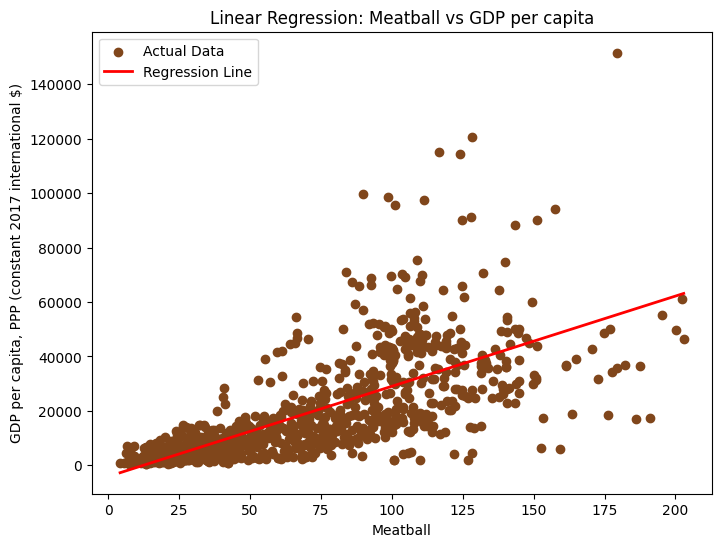

In [ ]:
import matplotlib.pyplot as plt

X_test_flat = X_test.values.flatten()
sort_idx = np.argsort(X_test_flat)
X_test_sorted = X_test_flat[sort_idx]
y_pred_sorted = y_pred[sort_idx]

scatter_color = "#80461B"

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color=scatter_color, label='Actual Data' )
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Meatball')
plt.ylabel('GDP per capita, PPP (constant 2017 international $)')
plt.title('Linear Regression: Meatball vs GDP per capita')
plt.legend()
plt.show()

In [77]:
#Check for an upward or downward trend in meatball growth per country
country_trends = {}

for country in merged_df['Entity'].unique():
    country_data = merged_df[merged_df['Entity'] == country]

    if len(country_data) < 5:  # Skip if too few data points
        continue

    X = country_data[['Year']]
    y = country_data['Meatball']

    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]
    country_trends[country] = slope
    print(f"Slope for {country}: {slope}")

# trend_df = pd.DataFrame.from_dict(country_trends, orient='index', columns=['Meatball_Trend_Slope'])
# trend_df = trend_df.sort_values(by='Meatball_Trend_Slope', ascending=False)
# print(trend_df)


Slope for Afghanistan: -0.25277748266992484
Slope for Albania: 1.2296981266519436
Slope for Algeria: 0.10162528664882702
Slope for Angola: 0.8723027447067453
Slope for Antigua and Barbuda: 1.16612393310264
Slope for Argentina: 0.7413024925164956
Slope for Armenia: 1.867415946027141
Slope for Australia: 0.5014655408944286
Slope for Austria: -0.5819297454343844
Slope for Azerbaijan: 0.8834061929528362
Slope for Bahamas: 0.6030874176900662
Slope for Bangladesh: 0.7269882881917158
Slope for Barbados: 0.4274950294620603
Slope for Belarus: 1.2525122371390434
Slope for Belgium: -1.2281820477696217
Slope for Belize: 0.5571936991716462
Slope for Benin: 0.6953724654087247
Slope for Bermuda: -0.145393391097745
Slope for Bolivia: 1.6179610513599716
Slope for Bosnia and Herzegovina: 1.4082890878390808
Slope for Botswana: -0.2464569122525661
Slope for Brazil: 1.7196087154890036
Slope for Brunei: 0.6272296927323308
Slope for Bulgaria: 0.1603241236528593
Slope for Burkina Faso: 0.6023840120252935
Slop